### Instrucciones generales <a class="tocSkip"></a>

1. Forme un grupo de **máximo dos estudiantes**
1. Versione su trabajo usando un **repositorio <font color="red">privado</font> de github**. Agregue a su compañero y a su profesor (usuario github: phuijse) en la pestaña *Settings/Manage access*. No se aceptarán consultas si la tarea no está en github. No se evaluarán tareas que no estén en github.
1. Se evaluará el **resultado, la profundidad de su análisis y la calidad/orden de sus códigos** en base al último commit antes de la fecha y hora de entrega". Se bonificará a quienes muestren un método de trabajo incremental y ordenado según el histórico de *commits*
1. Sean honestos, ríganse por el [código de ética de la ACM](https://www.acm.org/about-acm/code-of-ethics-in-spanish)



# Tarea 2: Filtrado de señales

## Introducción


Un **electrocardiograma (ECG)** es un gráfico de voltaje (amplitud) en función del tiempo correspondiente a la actividad eléctrica del corazón. Cada etapa del ciclo cardíaco es representado por una letra: **P, Q, R, S y T**. La siguiente figura muestra un esquema de un ECG con dos pulsos.

<img src="cardio.png" width="600">


El ECG se usa para hacer diagnósticos y en particular para analizar la existencia de anormalidades en el ciclo cardiaco. La **frecuencia cardiaca**, es decir el inverso del intervalo RR, de un humano normal en reposo está en el rango de **60 y 100 latidos por minuto**



## Enunciado

El hospital base de Valdivia tiene un electrocardiógrafo que mide la ECG en miliVolts [mV] a una frecuencia de muestreo de $360$ [Hz]

Durante el proceso de captura ciertos errores provocaron que la señal se contamine con 

- **(A)** Un ruido asociado al sistema eléctrico
- **(B)** Un ruido de baja frecuencia causado por un desperfecto del sensor
- **(C)** Un ruido blanco de origen térmico 

Esto complica el análisis del médico por lo que el hospital base los contrata a ustedes para **diseñar un filtro que limpie la señal ECG**

Resuelva las actividades que se piden a continuación, respondiendo y analizando donde corresponda

In [1]:

import numpy as np
import pickle
#%matplotlib notebook
import matplotlib.pylab as plt
import seaborn as sns
import scipy.signal
import scipy.fft as sfft
sns.set()
with open("ECG.pkl", "rb") as f:
    data = pickle.load(f)

Fs = 360
time = np.arange(len(data))/Fs
fig, ax = plt.subplots(figsize=(7, 3), tight_layout=True)
ax.plot(time, data)
ax.set_xlabel('Tiempo [s]')
ax.set_ylabel('Amplitud [mV]');


## Análisis (15%)

- Observe los primeros dos segundos de la señal, compare con el esquema mostrado en la introducción y discuta sobre los efectos causados por los ruidos **A**, **B** y **C** mencionados en el enunciado. Además responda  ¿Qué es un ruido blanco y que tipo de efecto introduce en la señal y en su espectro? ¿Qué es una tendencia y que tipo de efecto introduce en la señal y su espectro? 
- Calcule y muestre gráficamente el valor absoluto de la transformada de Fourier de la señal en función de la frecuencia y su espectrograma en función del tiempo y la frecuencia. Para el espectrograma decida el largo de ventana, traslape y tipo de ventana. Justifique su elección tomando en consideración el rango de frecuencias de un paciente normal y los *trade-off* aprendidos en clases
- En base a la señal, su espectro de magnitud y su espectrograma identifique la frecuencia central o el rango de frecuencias asociada a las tres fuentes de ruido. ¿En qué rango de frecuencias (Hz) se espera encontrar la señal de ritmo cardíaco de un humano normal en reposo?


Text(0.5, 1.0, 'Espectro fase vs. frecuencia')

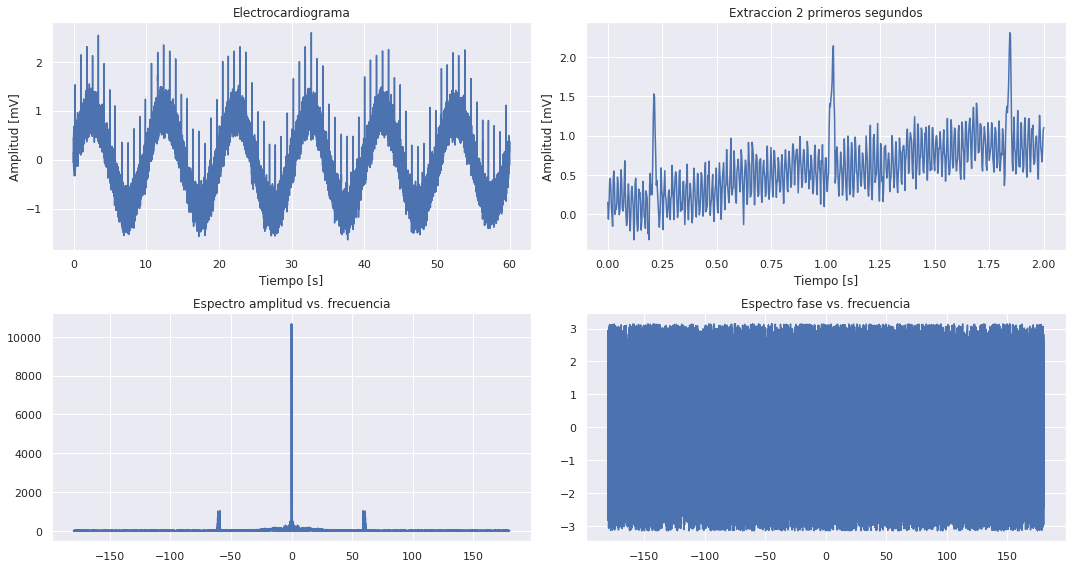

In [2]:

time1 = np.arange(len(data))/(Fs)
time2 = np.linspace(start=0,stop=2,num=720)
data2 = data[:720]
fig, axs = plt.subplots(2,2, figsize=(15,8), tight_layout=True)

axs[0,0].plot(time1, data)
axs[0,0].set_xlabel('Tiempo [s]')
axs[0,0].set_ylabel('Amplitud [mV]')
axs[0,0].set_title('Electrocardiograma')

axs[0,1].plot(time2, data2)
axs[0,1].set_xlabel('Tiempo [s]')
axs[0,1].set_ylabel('Amplitud [mV]')
axs[0,1].set_title('Extraccion 2 primeros segundos')


s = sfft.fft(data, len(data))
SA = np.absolute(s)
SP = np.angle(s)
freqs = sfft.fftfreq(len(data), 1/Fs)
axs[1,0].set_title("Espectro amplitud vs. frecuencia")
axs[1,0].plot(sfft.fftshift(freqs),sfft.fftshift(SA))

axs[1,1].plot(freqs, SP)
axs[1,1].set_title("Espectro fase vs. frecuencia")


                
En primer lugar, el gráfico del electrocardiograma estudia la frecuencia cardiaca de un paciente. De este, sabemos que debe entregar un gráfico con pulsaciones, sin embargo, el gráfico obtenido por el dispositivo entrega claramente una interferencia periódica, la cual está representada por una sinusoide.

El gráfico que contempla las muestras obtenidas en los tiempos [0, 2] segundos presenta de mejor manera un ruido de baja amplitud que perturba los datos relevantes para el estudio clínico.


En el gráfico amplitud vs frecuencia claramente se puede apreciar que la muestra está compuesta por componentes que se alzan del piso del ruido a frecuencias bajas, además, el ruido está presente en todas las frecuencias, por esta razón decimos que es ruido blanco. 
     
     
Se entiende por ruido blanco a una señal estocástica que está presente en toda la extensión de la muestra.



Text(0, 0.5, 'Amplitud [mV]')

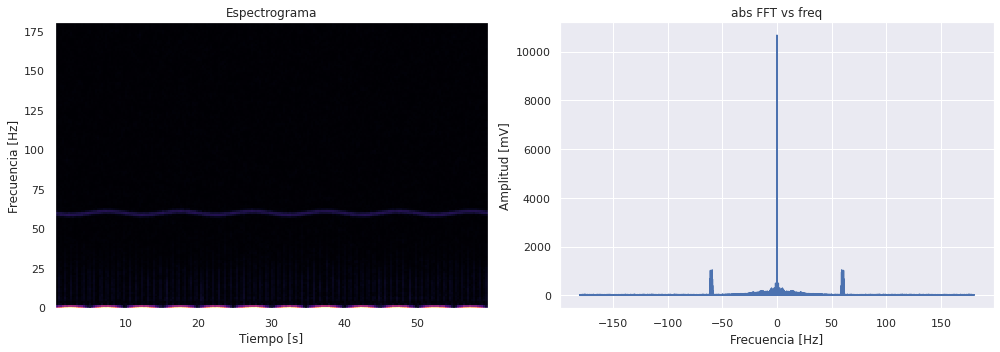

In [3]:

fig, (ax5, ax6) = plt.subplots(1,2, figsize=(14,5), tight_layout= True)
Nw = 300

# hay que definir las especificaciones adecuadas para un espectrograma de calidad
f,t, Sxx = scipy.signal.spectrogram(data, #señal 
                                    Fs, #frecuencia muestreo
                                    window=('kaiser', 6), # tipo ventana
                                    nperseg=Nw, #largo de ventana
                                    noverlap=Nw//1.5, #cantidad de traslape
                                    detrend=False,
                                    #return_onesided=True,
                                    #scaling='density',
                                    mode='magnitude',
                                    )


ax5.pcolormesh(t, f, Sxx, cmap=plt.cm.magma, shading= 'auto')
ax5.set_title('Espectrograma')
ax5.set_xlabel('Tiempo [s]')
ax5.set_ylabel('Frecuencia [Hz]')


ax6.plot(freqs, SA)
ax6.set_title('abs FFT vs freq')
ax6.set_xlabel('Frecuencia [Hz]')
ax6.set_ylabel('Amplitud [mV]')


De acuerdo a lo que se observa en el espectro de magnitud y espectrograma de la señal se puede observar un componente de frecuencias de aproximadamente 60Hz que se presenta a lo largo de toda la señal. Es probable que esta perturbación corresponda al ruido provocado por el sistema eléctrico (A), ya que por lo general el ruido de origen eléctrico se presenta con frecuencias entre [50-60]Hz. El ruido de baja frecuencia (B) es probable que se presente en un rango de frecuencias entre [0-1]Hz. Por último el ruido blanco de origen térmico dado su tipo es esperable que se encuentre a lo largo de todo el espectro de frecuencias. La frecuencia cardíaca de un persona normal debería encontrarse en el rango [1-1,66]Hz

- **Ruido asociado al sistema eléctrico**:
- **Ruido de baja frecuencia causado por un desperfecto del sensor**:
- **Ruido blanco de origen térmico**: 

### Preguntas
1. ¿Qué es un ruido blanco?¿Qué tipo de efecto introduce en la señal y en su espectro?

Es un tipo de ruido que se genera producto de un proceso estocástico, es decir, de manera aleatoria. Se caracteriza porque no existe correlación en sus valores con sus instantes pasados. Además, todas sus frecuencias tienen la misma amplitud, lo que se conoce como una densidad espectral de potencia constante. En una señal este ruido produce una perturbación sin una tendencia definida. En cuanto al espectro de la señal el ruido persiste y dependiendo de su intensidad puede llegar a contaminar por completo lo que se desea estudiar.
    
2. ¿Qué es una tendencia?¿Qué tipo de efecto introduce en la señal y su espectro?

En el contexto de lo estudiado se podría describir como una corriente o inclinación que modifica una señal de manera determinista pudiendo prever su comportamiento en el tiempo, donde por cierto existe una correlación. Como se comentó, una tendecia puede provocar cambios en una señal y por ende en su espectro, pero no una forma errática come en el caso del ruido blanco.

Respecto a la creación del espectrograma, el cual está compuesto por:

- tipo de ventana:
    
    Para que la ventana sea suave y evite agregar lóbulos laterales, hemos decidido utilizar ____________.
- largo de ventana: Para no perder resolución en frecuencia hemos decidido usar __________.
- traslape de ventana:

## Filtrado FIR (50%)

Describa lo que es un filtro FIR, explique paso a paso el método de enventanado y describa los argumentos y el valor de retorno de la función `scipy.signal.firwin`. 

Luego use este método para diseñar y aplicar tres filtros sobre la señal de entrada. El primero debe filtrar el ruido **(A)**, el segundo el ruido **(B)** y el tercero el ruido **(C)**. Indique la(s) frecuencia(s) de corte y el tipo de filtro en cada caso. Justifique su elección en base a sus observaciones en el paso anterior.

Considere una ventana de Hamming y $1001$ coeficientes para el filtro

Por cada filtro:
- Muestre la respuesta al impulso y la respuesta en frecuencia resultantes
- Filtre la señal convolucionando con la respuesta al impulso
- Calcule la resta entre la señal original y la señal filtrada. ¿Qué espera observar en este caso? Luego muestre gráficamente el espectro de magnitud y el espectrograma de la señal restada. En base a lo que observa y a los gráficos del punto anterior discuta sobre la efectividad del filtro

Finalmente
- Filtre la señal convolucionando con los tres filtros. Muestre el resultado graficamente. 
- Muestre un acercamiento de los primeros tres segundos de la señal filtrada, reconozca la fase R y márquela con una linea roja punteada.
- Cree una función que mida el tiempo RR en la señal filtrada. Grafique la frecuencia cardiaca en función del tiempo. ¿Se encuentra la persona en el rango sano o no?

### Filtro FIR 

Es un tipo de filtro digital cuyo nombre proviene del acrónimo FIR que significa de respuesta finita al impulso. Este tipo de filtros tienen una serie de características, tales como que pueden diseñarse con una fase perfectamente lineal, son filtros no recursivos, es decir, que la salida en un instante dado no depende de instantes anteriores son siempre estables al no tener realimentaciones y su respuesta al impulso coincide con el valor de sus coeficientes.

### Método de enventanado

Es una de las técnicas para el diseño de filtros FIR. Se puede describir en los siguientes pasos.

- Se diseña una plantilla en el dominio de la frecuencia con las cararactisticas que se desean para el filtro. Por ejemplo definir la frecuencia de corte.

- Una vez diseñada esta plantilla, se muestrea para luego calcular su transformada de Fourier discreta.

- Luego, se calcula la transformada de Fourier inversa para así obtener la respuesta a impulso.

- Finalmente, se toma una fracción de la respuesta a impulso obtenida, lo que se conoce como enventanado.


### Función scipy.signal.firwin

Esta función calcula y retorna los coeficientes de un filtro de respuesta al impulso finito mediante el metodo de enventanado.

### - Parámetros:
   
####  - numtaps : int 
Corresponde al número de coeficientes que tendrá el filtro.
    
#### - cutoff : float o arreglo unidimensional
Es la frecuencia de corte del filtro, puede ser un solo valor en caso de tratarse de un filtro pasa-bajo o pasa-alto, o puede ser un arreglo de frecuencias de corte en el caso de un filtro pasa-banda o rechaza-banda.
    
#### - width : float o None (opcional)
Si el argumento es distinto a None, corresponde al ancho aproximado de la región de transición para usar           en un diseño de filtro FIR tipo Kaiser.
    
#### - window : string o tupla de string y parámetros (opcional)
Aquí se espicifica el tipo de ventana que se usará en el filtro.
    
#### - pass_zero : {True,False,'bandpass', 'lowpass', 'highpass', 'bandstop'} (opcional)
Se establece si se desea o no dejar pasar la frecuencia cero.
   
#### - scale : bool (opcional)
Si el valor es True se escalarán los coeficientes de forma que la respuesta de frecuencia es unitaria en una frecuencia dada.
   
#### - nyq : float (opcional)
Este argumento se considera obsoleto y en su reemplazo se usa 'fs'. Corresponde a la frecuencia de Nyquist.        Cada frecuencia de corte en 'cutoff' debe estar entre 0 y 'nyq'. El valor por defecto es 1.
   
#### - fs : float (opcional)
Es la frecuencia de muestreo de la señal. Cada frecuencia de corte en 'cutoff' debe estar entre 0 y fs/2. El        valor por defecto es 2.
   
### - Retorno

#### -h(numtaps) ndarray
Arreglo de largo numtaps de los coeficientes del filtro FIR.
   

In [4]:
#Datos generales

window = 'hamming'
L = 1001
t = np.arange(-L//2, L//2, step=1)/Fs

/home/diego/miniconda3/envs/info183/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: scipy.convolve is deprecated and will be removed in SciPy 2.0.0, use numpy.convolve instead
  


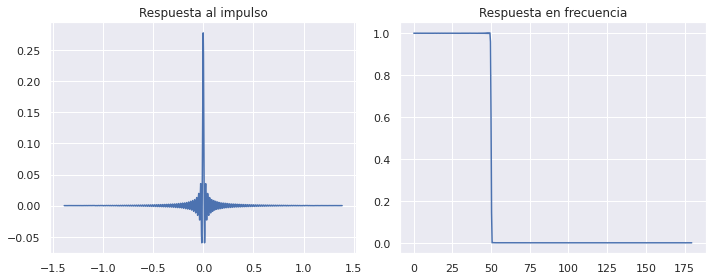

In [5]:
# Filtrado ruido A
#Filtro pasa-bajo

fc = 50
h = scipy.signal.firwin(numtaps=L, cutoff=fc, window=window, pass_zero=True, fs=360)
y = scipy.convolve(data, h, mode='same')
freq, H = scipy.signal.freqz(h, fs=Fs)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), tight_layout=True)

ax1.plot(t,h)
ax1.set_title('Respuesta al impulso')

ax2.plot(freq, np.absolute(H))
ax2.set_title('Respuesta en frecuencia')

Para la resta entre la señal original y la señal convulsionada con el filtro se espera obtener una señal constituida solo por el ruido filtrado.

Text(0, 0.5, 'Amplitud [mV]')

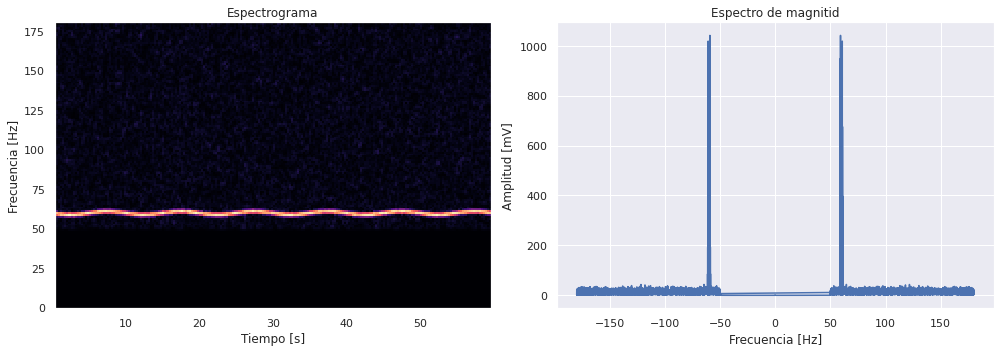

In [25]:
# Resta entre la señal original y la señal filtrada.
r = data - y
S = sfft.fft(r,len(r))
SA = np.absolute(s)
freqs = sfft.fftfreq(len(S),1/Fs)

fig, (ax5, ax6) = plt.subplots(1,2, figsize=(14,5), tight_layout= True)
Nw = 300

# hay que definir las especificaciones adecuadas para un espectrograma de calidad
f,t, Sxx = scipy.signal.spectrogram(r, #señal 
                                    Fs, #frecuencia muestreo
                                    window=('kaiser', 6), # tipo ventana
                                    nperseg=Nw, #largo de ventana
                                    noverlap=Nw//1.5, #cantidad de traslape
                                    detrend=False,
                                    #return_onesided=True,
                                    #scaling='density',
                                    mode='magnitude',
                                    )

ax5.pcolormesh(t, f, Sxx, cmap=plt.cm.magma, shading= 'auto')
ax5.set_title('Espectrograma')
ax5.set_xlabel('Tiempo [s]')
ax5.set_ylabel('Frecuencia [Hz]')


ax6.plot(freqs, SA)
ax6.set_title('Espectro de magnitud')
ax6.set_xlabel('Frecuencia [Hz]')
ax6.set_ylabel('Amplitud [mV]')

Se puede observar tento en el espectrograma como en el espectro de amplitud que la señal obtenida por la resta que la frecuencia que prime se encuentra alrededor de los 60Hz, lo que coincide con la frecuencia de ruido (A) que se pretendía eliminar proveniente del sistema eléctrico. Por lo tanto se puede concluir que esta fase de filtrado fue exitosa.

/home/diego/miniconda3/envs/info183/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.convolve is deprecated and will be removed in SciPy 2.0.0, use numpy.convolve instead
  """


Text(0.5, 1.0, 'Respuesta en frecuencia')

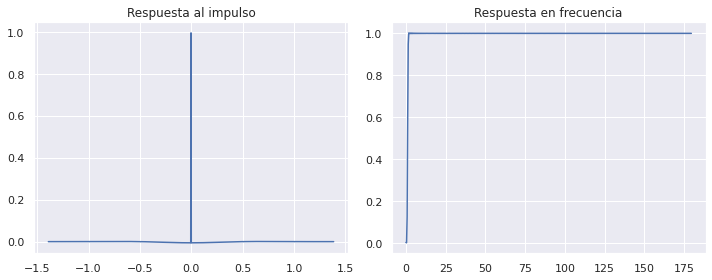

In [6]:
# Filtrado ruido B
#Filtro pasa-alto
fc = 1
h1 = scipy.signal.firwin(numtaps=L, cutoff=fc, window=window, pass_zero=False, fs=360)
y1 = scipy.convolve(data, h1, mode='same')

freq1, H1 = scipy.signal.freqz(h1, fs=Fs)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), tight_layout=True)

ax1.plot(t,h1)
ax1.set_title('Respuesta al impulso')

ax2.plot(freq1, np.absolute(H1))
ax2.set_title('Respuesta en frecuencia')


/home/diego/miniconda3/envs/info183/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: scipy.convolve is deprecated and will be removed in SciPy 2.0.0, use numpy.convolve instead
  """


Text(0.5, 1.0, 'Respuesta en frecuencia')

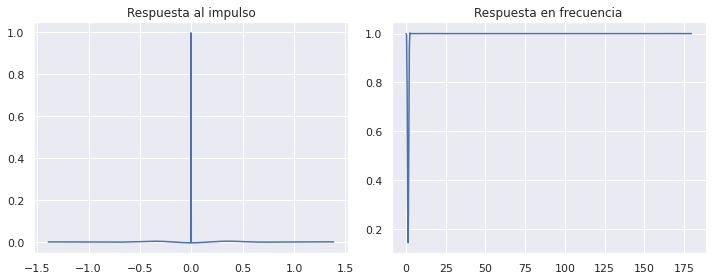

In [7]:
# Filtrado ruido C
#Filtro rechaza-banda
fc = [0.9,1.7]
h2 = scipy.signal.firwin(numtaps=L, cutoff=fc, window=window, pass_zero='bandstop', fs=360)
y2 = scipy.convolve(data, h2, mode='same')

freq2, H2 = scipy.signal.freqz(h2, fs=Fs)
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4), tight_layout=True)

ax1.plot(t,h2)
ax1.set_title('Respuesta al impulso')

ax2.plot(freq2, np.absolute(H2))
ax2.set_title('Respuesta en frecuencia')


/home/diego/miniconda3/envs/info183/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: scipy.convolve is deprecated and will be removed in SciPy 2.0.0, use numpy.convolve instead
  """Entry point for launching an IPython kernel.
/home/diego/miniconda3/envs/info183/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: scipy.convolve is deprecated and will be removed in SciPy 2.0.0, use numpy.convolve instead
  
/home/diego/miniconda3/envs/info183/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: scipy.convolve is deprecated and will be removed in SciPy 2.0.0, use numpy.convolve instead
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'Vista preliminar')

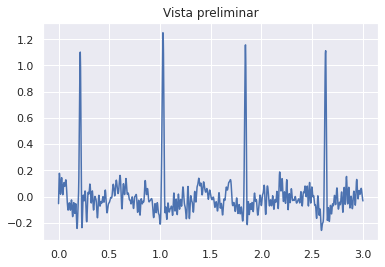

In [17]:
yf = scipy.convolve(data, h, mode='same')
yf = scipy.convolve(yf, h1, mode='same')
yf = scipy.convolve(yf, h2, mode='same')

time2 = np.linspace(start=0,stop=3,num=1080)
yf1 = yf[:1080]
plt.plot(time2,yf1)
plt.title('Vista preliminar')


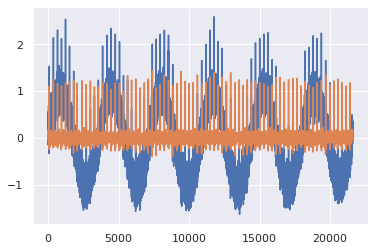

In [12]:
plt.plot(data)
plt.plot(yf)

## Filtrado IIR (35%)

Describa los filtros IIR y compárelo con los filtros FIR. Describa los argumentos y el valor de retorno de la función `scipy.signal.iirfilter`.

Luego use este método para diseñar tres filtros. Los filtros deben cumplir el mismo propósito que en el caso anterior. Considere filtros IIR de tipo `butterworth` y todos del mismo orden. Aplique los filtros sobre la señal de entrada usando la función `scipy.signal.lfilter`.

El objetivo es encontrar el mínimo orden para los filtros IIR tal que el error medio cuadrático entre la señal filtrada IIR y la señal filtrada FIR sea menor que un 1% de la varianza de la señal filtrada FIR. Es decir que si $x$ es la señal filtrada IIR e $y$ es la señal filtrada FIR donde $N = \min(\text{len}(x), \text{len}(y))$ se cumpla que

$$
\sum_{i=1}^N (x_i - y_i)^2 < 0.01 \sum_{i=1}^N (y_i - \bar y_i)^2
$$

Finalmente, discuta sobre sus hallazgos muestre gráficamente el resultado del mejor filtro IIR


### Filtro IIR
Son un tipo de filtros digitales al igual que los de tipo FIR cuyo nombre significa de respuesta al impulso infinita. Al contrario de los filtros FIR, estos son recursivos, es decir, la salida en un instante de tiempo dado de un filtro IIR depende tanto de las entradas actuales y pasadas como de las salidas en instantes anteriores. Por lo tanto, su respuesta al impulso se debe calcular recursivamente y en general en infinita.

### Función scipy.signal.iirfilter

Esta función diseña filtros IIR tanto digitales como analógicos dado el orden y puntos críticos.

### - Parámetros:
   
####  - N : int
Orden del filtro.

#### -Wn : array
Secuencia de valores dando las frecuencias críticas. Para filtros digitales, 'Wn' está las mismas unidades que la frecuencia de muestreo 'fs'. En el caso de filtro analógicos, 'Wn' es una frecuencia angular.

#### -rp : float (opcional)
Para filtros Chebyshev y elípticos proporciona la perturbación máxima en el pasa-banda.

#### -rs : float (opcional)
Para filtros Chebyshev y elípticos proporciona la atenuación mínima en el rechaza-banda.

#### -btype : {‘bandpass’, ‘lowpass’, ‘highpass’, ‘bandstop’} (opcional) 
Aquí se especifica el  tipo de filtro que se usará. El valor por defecto es 'bandpass' (pasa-banda)

#### -analog : bool (opcional)
Si se establece como 'true', se retorna un filtro será análogico, de otra forma se retorna un filtro digital.

#### -ftype : str (opcional)
Se establece el tipo de filtro IIR a diseñar. Puede tomar valores como: 'butter'(Butterworth), 'cheby1'(Chebyshev I), 'cheby2'(Chebyshev II), 'ellip'(Cauer/elíptico) o 'bessel'(Bessel/Thompson).

#### -output : {‘ba’, ‘zpk’, ‘sos’} (opcional)
Se especifica el tipo de salida que se desea.

#### -fs : float (opcional)
La frecuencia de muestreo del sistema digital.

### - Retorno

#### -b, a : ndarray, ndarray
Numerador(b) y denominador(a) polinomiales del filtro IIR. Solo se retorna si output='ba'.

#### -z, p, k : ndarray, ndarray, float
Ceros(z), polos(p) y ganancia del sistema(k) de la función de transferencia del filtro IIR. Solo se retorna si output='zpk'.

#### -sos : ndarray
Representación de las secciones de segundo orden del filtro IIR. Solo se retorna si output='sos'.




In [5]:
import scipy.signal
#scipy.signal.iirfilter?